<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Solving-Differential-Equations-with-Neural-Networks" data-toc-modified-id="Solving-Differential-Equations-with-Neural-Networks-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Solving Differential Equations with Neural Networks</a></span><ul class="toc-item"><li><span><a href="#Universal-Approximation-Theorems" data-toc-modified-id="Universal-Approximation-Theorems-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Universal Approximation Theorems</a></span></li><li><span><a href="#Description-of-Method" data-toc-modified-id="Description-of-Method-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Description of Method</a></span><ul class="toc-item"><li><span><a href="#General-Description" data-toc-modified-id="General-Description-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>General Description</a></span></li><li><span><a href="#Gradient-Computation" data-toc-modified-id="Gradient-Computation-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Gradient Computation</a></span></li></ul></li><li><span><a href="#Illustration-of-Method" data-toc-modified-id="Illustration-of-Method-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Illustration of Method</a></span><ul class="toc-item"><li><span><a href="#Solving-single-ODEs-and-systems-of-coupled-ODEs" data-toc-modified-id="Solving-single-ODEs-and-systems-of-coupled-ODEs-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Solving single ODEs and systems of coupled ODEs</a></span><ul class="toc-item"><li><span><a href="#First-order-ODEs" data-toc-modified-id="First-order-ODEs-1.3.1.1"><span class="toc-item-num">1.3.1.1&nbsp;&nbsp;</span>First order ODEs</a></span></li><li><span><a href="#Second-order-ODEs" data-toc-modified-id="Second-order-ODEs-1.3.1.2"><span class="toc-item-num">1.3.1.2&nbsp;&nbsp;</span>Second order ODEs</a></span></li><li><span><a href="#Systems-of-K-first-order-ODEs" data-toc-modified-id="Systems-of-K-first-order-ODEs-1.3.1.3"><span class="toc-item-num">1.3.1.3&nbsp;&nbsp;</span>Systems of <em>K</em> first order ODEs</a></span></li></ul></li><li><span><a href="#Solving-single-PDEs" data-toc-modified-id="Solving-single-PDEs-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Solving single PDEs</a></span></li></ul></li><li><span><a href="#Automatic-Differentiation-(Autograd)-and-Backpropagation" data-toc-modified-id="Automatic-Differentiation-(Autograd)-and-Backpropagation-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Automatic Differentiation (Autograd) and Backpropagation</a></span></li><li><span><a href="#Problems" data-toc-modified-id="Problems-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Problems</a></span><ul class="toc-item"><li><span><a href="#Problem-1:-Single-ODE" data-toc-modified-id="Problem-1:-Single-ODE-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Problem 1: Single ODE</a></span></li><li><span><a href="#Problem-2:-Second-order-ODE" data-toc-modified-id="Problem-2:-Second-order-ODE-1.5.2"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>Problem 2: Second-order ODE</a></span></li><li><span><a href="#Problem:-Single-ODE" data-toc-modified-id="Problem:-Single-ODE-1.5.3"><span class="toc-item-num">1.5.3&nbsp;&nbsp;</span>Problem: Single ODE</a></span></li></ul></li></ul></li></ul></div>

# Solving Differential Equations with Neural Networks

## Universal Approximation Theorems
A thorough, techincal rewrite of the original <a href="https://en.wikipedia.org/wiki/Universal_approximation_theorem">Cybenko Theorem (aka Universal Approximation Theorem for Neural Networks)</a> can be found <a href="http://mcneela.github.io/machine_learning/2017/03/21/Universal-Approximation-Theorem.html">here</a>.

Briefly, the Cybenko-Hornik-Funahasi Theorem is as such:

Let $\sigma$ be an sigmoidal function. Let all inputs be on $[0, 1]$ or another finite interval.

Let $I_d$ be the $d$-dimensional cube $[0, 1]^d$

Then a sum of the form:
$$f_a(\vec{x}) = \sum_j w_j \sigma(b_j + \vec{v}_j \cdot \vec{x})$$

can approximate any continuous function $f$ to any accuracy. It might require any number of hidden neurons.

*A continued explanation and its underlying theorems can be found <a href="http://www.cs.utsa.edu/~bylander/cs4793/univ-approx.pdf">here</a>.*

## Description of Method

As described by the following papers: 

(1) *Artificial Neural Networks for Solving Ordinary and Partial Differential Equations* by Lagaris, Likas, and Fotiadis

(2) *Solving differential equautions using neural networks* by Chiaramonte and Kiener

### General Description

This approach is illustrated in terms of the following general definition of differential  equations:

\begin{equation}
G(\vec{x},\psi(\vec{x}),\nabla\psi(\vec{x}),\nabla^2\psi(\vec{x})) = 0, \vec{x}\in{D}
\end{equation}

where $\psi(\vec{x})$ is the scalar-valued solution to be computed.

This definition is subject to certain boundary conditions (such as Dirichlet and/or Neumann), where $\vec{x} = (x_1,...,x_n) \in{R^n}, D \subset R^n$ denotes the definition domain.

A solution to the above differential equation is attained by assuming a discretized domain $D$ and its boundary $S$ into a set of points $\hat{D}$ and $\hat{S}$.

The problem is then transformed thusly:

\begin{equation}
G(\vec{x_i},\psi(\vec{x_i}),\nabla\psi(\vec{x_i}),\nabla^2\psi(\vec{x_i})) = 0, \forall\vec{x_i}\in{D}
\end{equation}

Also subject to any boundary condition-imposed constraints.

If $\psi_t(\vec{x},\vec{p})$ denotes the optimal trial solution with adjustable parameters $\vec{p} = arg min_{\vec p} J(\vec p)$, the problem is transformed to:

\begin{equation}
J(p) = min_{\vec{p}} \sum_{\vec{x_i}\in{\hat{D}}} G(\vec{x_i},\psi(\vec{x_i}, \vec{p}),\nabla\psi(\vec{x_i}, \vec{p}),\nabla^2\psi(\vec{x_i}, \vec{p}))^2
\end{equation}

subject to any constraints imposed by boundary conditions.

The trial solution $\psi_t$ employs a feedforward neural network and the parameters $\vec{p}$ correspond to the weights and biases of the neural architecture. 

One the parameters $\vec p$ have been attained, the trial solution $\psi_t (\vec x, \vec p)$ is a smooth, continuous, differentiable approximation to the true solution.

In order to satisfy the boundary conditions a form is constructed for the trial function $\psi_t(\vec{x})$ as a sum of two terms:

\begin{equation}
\psi_t(\vec{x}) = A(\vec{x}) + F(\vec{x}, N(\vec{x},\vec{p}))
\end{equation}

where $N(\vec{x},\vec{p})$ is a single-output feedforward neural network with parameter $\vec{p}$ and $n$ input units fed with the input vector $\vec{x}$.

The term $A(x)$ contains no adjustable parameters and satisfies the boundary conditions and often must be constructed from piecewise boundary conditions. 

The second term $F$ is constructed so as not to contribute to the boundary conditions, since $\psi_t(\vec{x})$ must also satisfy them, and employs a neural network whose weights and biases are to be adjusted in order to deal with the minimization problem.

Due to the choice of form, the problem which was originally a constained problem is now unconstrained and therefore much easier to deal with.

Now, all that is left to do is detail a systematic way to construct the trial solution (i.e. the functional forms of both $A$ and $F$.)

### Gradient Computation

The efficient minimization of equation **(3)** is part of the training process of the neural network, where the error corresponding ot each input vector $\vec{x_i}$ is the value of $G(\vec{x_i})$ which has to come as close to zero as possible.


Computation of this error value involves the network output (as is the case in conventional training) as well as the derivatives of the output with respect to its inputs.


Therefore, in computing the gradient of the error with respect to the network weights, the gradient of the network as well as the gradient of the network derivatives (with respect to its inputs) must be computed.

Consider a multilayer perceptron with $n$ input units, one hidden with $H$ sigmoid units and a linear output unit. 

The case of more than one hidden layers can be likewise obtained as well.

![neural_network_schematic](img/nn_schematic.png)

*Schematic of NN with n + 1 input nodes, H hidden nodes, and 1 output node __taken from paper (2)__*

For a given input vector $\vec{x}=(x_1,...,x_n)$ the output of the network is $N=\sum^H_{i=1}v_i\sigma(z_i)$ where $z_i=\sum^N_{j=1}w_{ij}x_j+u_i$. $w_{ij}$ denotes the weight from the input unit $j$ to the hidden unit $i$; $v_i$ denotes the weight from the hidden unit $i$ to the output; $u_i$ denotes the bias of the hidden unit $i$ and $\sigma(z)$ is the sigmoid transfer function.

It is straightforward to show that:

\begin{equation}
\frac{\partial^k{N}}{\partial{x^k_j}} = \sum^H_{i=1}v_i w_{ij}^k\sigma_i^{(k)}
\end{equation}

where $\sigma_i = \sigma(z_i)$ and $\sigma^{(k)}$ denotes the $k^th$ order derivative of the sigmoid.

\begin{equation}
\frac{\partial^{\lambda _1}{}}{\partial{x^{\lambda _1}_1}} \frac{\partial^{\lambda_2}{}}{\partial{x^{\lambda _2}_2}} ... \frac{\partial^{\lambda_n}{}}{\partial{x^{\lambda _n}_n}} N = \sum^n_{i=1}v_i P_i \sigma_i^{(\Lambda)}
\end{equation}

where

\begin{equation}
P_i = \prod^n_{k=1}w^{\lambda_k}_{ik}
\end{equation}

and $\Lambda=\sum^n_{i=1}\lambda_i$

\begin{equation}
\frac{\partial{N_g}}{\partial{v_i}} = P_i\sigma_i^{(\Lambda)}
\end{equation}

\begin{equation}
\frac{\partial{N_g}}{\partial{u_i}} = v_i P_i\sigma_i^{(\Lambda + 1)}
\end{equation}

\begin{equation}
\frac{\partial{N_g}}{\partial{w_{ij}}} = x_j v_i P_i\sigma_i^{(\Lambda + 1)} + v_i \lambda_j w_{ij}^{\lambda_j - 1} (\prod_{k=1,k \ne j} w_{ik}^{\lambda_k})\sigma_i^{(\Lambda)}
\end{equation}

Once the derivative of the error with respect to the network parameters has been defined, it is straightforward to employ nearly any minimization technique. This is especially true since the problem has been constructed to have an unconstrained form.

What does this mean? It means that it is possible to use a steepest ascent method (i.e. backpropogation or any variant thereof), the conjugate gradient method, or any technique at all described in literature such as *Practical Methods of Optimization 2nd Ed.* by R. Fletcher (1987).

Furthermore, optimization is parallelizable and in the case of backpropagation, weights can be updated in batches.

## Illustration of Method

Here we cover several cases commonly encountered by scientists in various fields.

### Solving single ODEs and systems of coupled ODEs

#### First order ODEs

Consider this first order ODE:

$$\frac{\partial{\psi}}{\partial{x}} = f(x,\psi)$$

with $x \in [0,1]$ and initial conditions $\psi(0)=A$.


A trial solution is written as:

\begin{equation}
\psi_t(x)=A+xN(x,\vec{p})
\end{equation}

where $N(x,\vec{p})$ is the output of the feedforward neural network with a single input unit for x and weights $\vec{p}$. Note that $\psi_t(x)$ satisfies the initial conditions by construction. The error quantity to be minimized is

\begin{equation}
E[\vec{p}] = \sum_i \{\frac{\partial{\psi_t(x_i)}}{dx} - f(x_i,\psi_t(x_i))\}^2
\end{equation}

where $x_i$'s are points on $[0,1]$. Since $d\psi_t(x)/dx = N(x, \vec{p}) + x dN/dx$ it is also straightforward to compute the gradient of the error with respect to the parameters $\vec{p}$ using equations **(5)** - **(10)**. The same holds for all subsequent model problems.

#### Second order ODEs

The same procedure applies:

$$\frac{\partial^2{\psi}}{\partial{x^2}} = f(x,\psi, \frac{\partial{\psi}}{\partial{x}})$$

For the *initial value* problem: $\psi(0)=A$ and $\frac{d}{dx}\psi(0)=A'$, the trial solution can be written as:

\begin{equation}
\psi_t(x) = A + A'x + x^2N(x,\vec{p})
\end{equation}

For the *two-point Dirichlet* boundary condition problem: $\psi(0)=A$ and $\frac{d}{dx}\psi(0)=A'$, the trial solution can be written as:

\begin{equation}
\psi_t(x) = A(1 - x) + Bx + x(1 - x)N(x,\vec{p})
\end{equation}

In these two cases of second order ODEs, the error function to be minimized is given by equation **(12)**.

#### Systems of *K* first order ODEs

$$\frac{d\psi_i}{dx} = f_i(x,\psi_1,\psi_2,...,\psi_K)$$

with $\psi_i(0) = A_i,  i=(1,...,K)$ we consider one neural network for each trial solution $\psi_{t_i} (i = 1,...,K)$ which is written as:

\begin{equation}
\psi_{t_i}(x) = A_i + xN_i(x,\vec{p_i})
\end{equation}

and we minimize the quantity:

\begin{equation}
E[\vec{p}] = \sum^K_{k=1} \sum_i \{ \frac{d\psi_{t_k}(x_i)}{dx} = f_k(x_i, \psi_{t_1}, \psi_{t_2}, ..., \psi_{t_K}) \}
\end{equation}

### Solving single PDEs

Though we only address the case of two-dimensional problems, extension to more dimensions follows straightforwardly.

Consider the *Poisson equation*:

$$\frac{\partial{^2}}{\partial{x^2}}\psi{(x,y)} + \frac{\partial{^2}}{\partial{y^2}}\psi{(x,y)} = f(x, y)$$

$x \in [0,1]$, $ \in [0,1]$

with *Dirichlet boundary conditions*: $\psi{(0,y)} = f_0(y)$, $\psi{(1,y)} = f_1(y)$ and $\psi{(x,0)} = g_0(x)$, $\psi{(x,1)} = g_1(x)$.

The trial solution is written as:

\begin{equation}
\psi_t(x,y) = A(x,y) + x(1-x) y(1-y) N(x,y,\vec{p})
\end{equation}

where $A(x,y)$ is chosen so as to satisfy the boundary conditions such that:

\begin{equation}
A(x,y) = (1-x) f_0(y) + xf_1(y) + (1-y) \{ g_0(x) - [(1-x)]g_0(0) + xg_0(1)]\} + y \{ g_1(x) - [(1-x)g_1(0) + xg_1(1)] \}
\end{equation}

with *mixed boundary conditions* (ie. Dirichlet on part of the boundary and Neumann elsewhere) of the form: $\psi{(0,y)} = f_0(y)$, $\psi{(1,y)} = f_1(y)$, $\psi{(x,0)} = g_0(x)$, and $\frac{\partial}{\partial{x}}\psi{(x,1)} = g_1(x)$.

The trial solution is written as:

\begin{equation}
\psi_t(x,y) = B(x,y) + x(1-x) y[N(x,y,\vec{p}) - N(x,1,\vec{p}) - \frac{\partial}{\partial{y}}N(x,1,\vec{p})]
\end{equation}

where $B(x,y)$ is chosen so as to satisfy the boundary conditions such that:

\begin{equation}
B(x,y) = (1-x) f_0(y) + xf_1(y) + g_0(x) - [(1-x)g_0(0) + xg_0(1)] + y \{ g_1(x) - [(1-x)g_1(0) + xg_1(1)]\}
\end{equation}

Note that the second term of this trial solution does not affect the boundary conditions since it vanishes at the part of the boundary where the Dirichlet conditions are imposed, and its gradient component normal to the boundary vanishes at the part where the Neumann conditions are imposed.

The error to be minimized in all PDE problems above is given:

\begin{equation}
E[\vec{p}] = \sum_i \{ \frac{\partial{^2}}{\partial{x^2}}\psi(x_i,y_i) + \frac{\partial{^2}}{\partial{y^2}}\psi(x_i,y_i) - f(x_i,y_i) \}^2
\end{equation}

where $(x_i,y_i)$ are points in $[0,1] \times [0,1]$.

## Automatic Differentiation (Autograd) and Backpropagation

Study Sources: 
 - https://ml-cheatsheet.readthedocs.io/en/latest/backpropagation.html
 - https://www.youtube.com/watch?v=MswxJw-8PvE
 - https://towardsdatascience.com/pytorch-autograd-understanding-the-heart-of-pytorchs-magic-2686cd94ec95 (see additional reading at bottom)

What is `autograd`? What are we using it for?

The answer lies in the construction and definition of an artificial neural network, specifically a step called __Backpropagation__.

The goal of backpropagation is straightforward: update the weights according to their respective errors in order to minimize the overall error as much as possible and necessary. 

As the overall error approaches zero, the network's ability to model and predict becomes increasingly accurate.

## Problems

Note: For automatic differentiation we use the following module: https://github.com/HIPS/autograd

### Problem 1: Single ODE

Consider a simple ordinary differential equation in the following form:

$$\frac{\partial{\psi}}{\partial{x}} = f(x,\psi)$$

Suppose that

$$f(x,\psi) + \psi \cdot A(x)= B(x)$$

Where
$$A(x) = x + \frac{(1 + 3x^2)}{1 + x + x^3} $$
$$B(x) = x^3 + 2x + x^2 \frac{1 + 3x^2}{1 + x + x^3}$$

With $\psi(0) = 1$ and $x \in [0,1]$

Therefore we have

$$f(x,\psi) = (x^3 + 2x + x^2 \frac{1 + 3x^2}{1 + x + x^3}) - \psi (x + \frac{(1 + 3x^2)}{1 + x + x^3})$$

The analytic solution to this problem is

$$\psi_a(x) = \frac{e^{\frac{-x^2}{2}}}{1+x+x^3} + x^2$$

0.10005159751990923
[array([[-0.95184713, -1.1065391 ,  0.50911579,  0.98587853, -0.69351543,
        -1.220991  , -0.68710567, -1.2549278 ,  0.02622794,  0.22489203]]), array([[-0.15130773],
       [-1.06580747],
       [ 0.94946716],
       [ 0.25938481],
       [-1.90215291],
       [-0.22650725],
       [-0.88515897],
       [-1.21579563],
       [ 2.55441696],
       [-0.55015239]])]


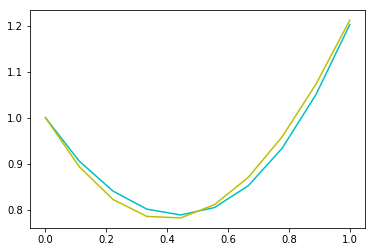

In [8]:
import autograd.numpy as np
from autograd import grad 
import autograd.numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline

# Number of disceret points in x dimension
nx = 10

# discrete change in x
dx = 1. / nx

# left side of initial equation
def A(x):
    return x + (1. + 3.*x**2) / (1. + x + x**3)

# right side of equation
def B(x):
    return x**3 + 2.*x + x**2 * ((1. + 3.*x**2) / (1. + x + x**3))

# unconstrained form which can satisfyboundary conditions
def f(x, psi):
    return B(x) - psi * A(x)

# analytic solution for comparison
def psi_analytic(x):
    return (np.exp((-x**2)/2.)) / (1. + x + x**3) + x**2

x_space = np.linspace(0, 1, nx)    
y_space = psi_analytic(x_space)

#psi_fd = np.zeros_like(y_space)
#psi_fd[0] = 1. # Initial Conditions

#for i in range(1, len(x_space)):
#    psi_fd[i] = psi_fd[i-1] + B(x_space[i]) * dx - psi_fd[i-1] * A(x_space[i]) * dx
    
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_grad(x):
    return sigmoid(x) * (1 - sigmoid(x))

def neural_network(W, x):
    a1 = sigmoid(np.dot(x, W[0]))
    return np.dot(a1, W[1])

def d_neural_network_dx(W, x, k=1):
    return np.dot(np.dot(W[1].T, W[0].T**k), sigmoid_grad(x))

def loss_function(W, x):
    loss_sum = 0.
    for xi in x:
        net_out = neural_network(W, xi)[0][0]
        psi_t = 1. + xi * net_out
        d_net_out = d_neural_network_dx(W, xi)[0][0]
        d_psi_t = net_out + xi * d_net_out
        func = f(xi, psi_t)       
        err_sqr = (d_psi_t - func)**2

        loss_sum += err_sqr
    return loss_sum

# Initialize weights with random values
W = [npr.randn(1, 10), npr.randn(10, 1)]

# Set learning rate
lmb = 0.001

for i in range(1000):
    loss_grad =  grad(loss_function)(W, x_space)
    
    W[0] = W[0] - lmb * loss_grad[0]
    W[1] = W[1] - lmb * loss_grad[1]
    
#     print(loss_function(W, x_space))

print(loss_function(W, x_space))
res = [1 + xi * neural_network(W, xi)[0][0] for xi in x_space] 

print(W)

plt.figure()
plt.plot(x_space, y_space, c='c') 
#plt.plot(x_space, psi_fd, c='m')
plt.plot(x_space, res, c='y')
plt.show()

### Problem 2: Second-order ODE

$$\frac{d^2}{dx^2}\psi + \frac{1}{5}\frac{d}{dx}\psi +\psi = -\frac{1}{5} e^{-\frac{x}{5}}cos(x)$$

with $\psi(0) = 0$ and $\frac{d}{dx}\psi(0)=1$ and $x \in [0,2]$


The analytic solution is $\psi_a(x) = e^{-\frac{x}{5}}sin(x)$

and the trial solution of the neural network is $\psi_t(x) = x + x^2 N(x, \vec{p})$ according to equation (13).

0.7748732841821071


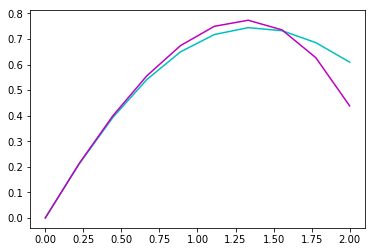

In [29]:
import autograd.numpy as np
from autograd import grad 
import autograd.numpy.random as npr

%matplotlib inline

nx = 10
dx = 1. / nx

def f(x, psi, dpsi):
    return -1./5. * np.exp(-x/5.) * np.cos(x) - 1./5. * dpsi - psi

def psi_analytic(x):
    return np.exp(-x/5.) * np.sin(x)

x_space = np.linspace(0, 2, nx)    
y_space = psi_analytic(x_space)

def sigmoid(x):
    return 1. / (1. + np.exp(-x))

def neural_network(W, x):
    a1 = sigmoid(np.dot(x, W[0]))
    return np.dot(a1, W[1])

def neural_network_x(x):
    a1 = sigmoid(np.dot(x, W[0]))
    return np.dot(a1, W[1])

def psi_trial(xi, net_out):
    return xi + xi**2 * net_out

psi_grad = grad(psi_trial)
psi_grad2 = grad(psi_grad)

def loss_function(W, x):
    loss_sum = 0.
    
    for xi in x:
        net_out = neural_network(W, xi)[0][0]

        net_out_d = grad(neural_network_x)(xi)
        net_out_dd = grad(grad(neural_network_x))(xi)
        
        psi_t = psi_trial(xi, net_out)
        
        gradient_of_trial = psi_grad(xi, net_out)
        second_gradient_of_trial = psi_grad2(xi, net_out)
        
        func = f(xi, psi_t, gradient_of_trial) # right part function
        
        err_sqr = (second_gradient_of_trial - func)**2
        loss_sum += err_sqr
        
    return loss_sum

W = [npr.randn(1, 10), npr.randn(10, 1)]
lmb = 0.001

for i in range(50):
    loss_grad =  grad(loss_function)(W, x_space)

    W[0] = W[0] - lmb * loss_grad[0]
    W[1] = W[1] - lmb * loss_grad[1]

print(loss_function(W, x_space))
res = [psi_trial(xi, neural_network(W, xi)[0][0]) for xi in x_space] 


plt.figure()
plt.plot(x_space, y_space, c='c') 
plt.plot(x_space, res, c='m')
plt.show()

### Problem: Single ODE

$$\frac{d}{dx}\psi + \frac{1}{5}\psi = e^{-\frac{x}{5}}cos(x)$$

with $\psi(0) = 0$ and $x \in [0,2]$

 $\psi_a(x) = e^{-\frac{x}{5}}sin(x)$
 
 The trial solution is again $\psi_t(x) = xN(x, \vec p)$

0.03184458360186081


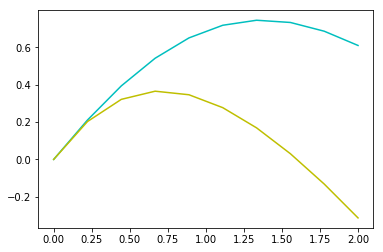

In [26]:
import autograd.numpy as np
from autograd import grad 
import autograd.numpy.random as npr

%matplotlib inline

nx = 10
dx = 1. / nx

def f(x, psi):
    return np.exp(-x/5.) * np.cos(x) - 1./5. * psi

def psi_analytic(x):
    return np.exp(-x/5.) * np.sin(x)

x_space = np.linspace(0, 2, nx)    
y_space = psi_analytic(x_space)

def sigmoid(x):
    return 1. / (1. + np.exp(-x))

def neural_network(W, x):
    a1 = sigmoid(np.dot(x, W[0]))
    return np.dot(a1, W[1])

def neural_network_x(x):
    a1 = sigmoid(np.dot(x, W[0]))
    return np.dot(a1, W[1])

def psi_trial(xi, net_out):
    return xi * net_out

d_psi_trial = grad(psi_trial)

def loss_function(W, x):
    loss_sum = 0.
    
    for xi in x:
        net_out = neural_network(W, xi)[0][0]
        d_net_out = grad(neural_network_x)(xi)
        psi_t = psi_trial(xi, net_out)
        d_psi_t = d_psi_trial(xi, net_out)
        func = f(xi, psi_t)
        err_sqr = (d_psi_t - func)**2        
        loss_sum += err_sqr
        
    return loss_sum

W = [npr.randn(1, 10), npr.randn(10, 1)]
lmb = 0.005

for i in range(1000):
    loss_grad =  grad(loss_function)(W, x_space)

    W[0] = W[0] - lmb * loss_grad[0]
    W[1] = W[1] - lmb * loss_grad[1]

print(loss_function(W, x_space))
res = [psi_trial(xi, neural_network(W, xi)[0][0]) for xi in x_space] 


plt.figure()
plt.plot(x_space, y_space, c='c') # analytic solution
plt.plot(x_space, res, c='y') # neural network
plt.show()